In [224]:
"""
Magic commands
"""
%matplotlib inline
%load_ext autoreload
%autoreload 2

"""
Python standard packages
"""
import os
import sys
from IPython.display import display, clear_output

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.colors as colors
from matplotlib import cm
import seaborn as sns
sns.set_theme("paper", "whitegrid")
"""
packages for dataload and simulation
"""
import ffn # data access
from arch import arch_model  # simulation
from arch.univariate import SkewStudent, GARCH, EGARCH, ARX
"""
Own packages
"""
sys.path.insert(0, "C:\\code\\speciale\\") # vesl path
sys.path.insert(0, "C:\\Users\\lucas\\OneDrive\\Skrivebord\\repo\\speciale\\") # ljb path

from stock_simulation_study.stock_environment import StockEnvironment, StockEnvironmentTwo
from stock_simulation_study.stock_agent import RLStockAgent
#==============
from stock_simulation_study.reinforce import REINFORCE_Agent
import time
#==============

import codelib  # used for extending pandas

from codelib.plotting import DefaultStyle, fan_chart, default_colors
DefaultStyle()

"""
ignore warnings
"""
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [652]:
aapl_prices = ffn.get('spy', start = '2010-01-01', end = '2020-01-01')

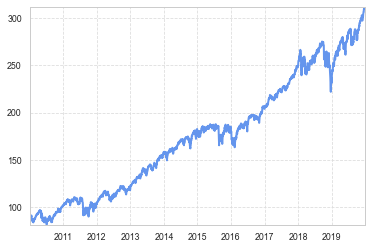

In [653]:
plt.plot(aapl_prices)

In [668]:
def position_plot(actions, price, title, savefig = "", ylab = ""):
    annotation = pd.DataFrame(actions.values, columns = {"pos"})
    to_join = pd.DataFrame({'col_map': ['red', 'orangered', 'yellow', 'lightgreen', 'green'],
                            'pos': [-2, -1, 0, 1, 2]})
    c = annotation.merge(to_join, on='pos', how='left')["col_map"]
    x = np.linspace(0, len(price), len(price)+1)
    lines = [((x0,y0), (x1,y1)) for x0, y0, x1, y1 in zip(x[:-1], price[:-1], x[1:], price[1:])]
    colored_lines = LineCollection(lines, colors=c, linewidths=(2,))

    fig, ax = plt.subplots(1,figsize=(6, 4))
    fig.tight_layout()
    ax.add_collection(colored_lines)
    ax.autoscale_view()
    plt.title(title)
    plt.xlabel("timestep")
    plt.ylabel(ylab)
    if savefig != "":
        plt.savefig(savefig, bbox_inches='tight')
    plt.show()
    


def color_plot(color_vals, y_vals, title, savefig = ""):
#     x = np.linspace(0, 3 * np.pi, 500)
#     y = np.sin(x)
#     dydx = np.cos(0.5 * (x[:-1] + x[1:]))
    x = np.linspace(0, len(y_vals), len(y_vals))
    y = y_vals
    dydx = color_vals
    # Create a set of line segments so that we can color them individually
    # This creates the points as a N x 1 x 2 array so that we can stack points
    # together easily to get the segments. The segments array for line collection
    # needs to be (numlines) x (points per line) x 2 (for x and y)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    fig, axs = plt.subplots(1, figsize=(6, 4))
    fig.tight_layout()
    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(dydx.min(), dydx.max())
    cmap = cm.RdYlGn
    lc = LineCollection(segments, cmap=cmap, norm=colors.CenteredNorm())
    # Set the values used for colormapping
    lc.set_array(dydx)
    lc.set_linewidth(2)
    line = axs.add_collection(lc)
    fig.colorbar(line, ax=axs)

    #axs.set_xlim(x.min(), x.max())
    #axs.set_ylim(dydx.min(), dydx.max()+1)
    axs.autoscale_view()
    plt.title(title)
    plt.xlabel("timestep")
    plt.ylabel("price")
    if savefig != "":
        plt.savefig(savefig, bbox_inches='tight')
    plt.show()


# REINFORCE AGENT ON SIMULATED DATA

In [665]:
n_time_points = int(250*2.5)
N_EPISODES = 100
nstocks = 1
lag = 1
env = StockEnvironmentTwo(prices = aapl_prices, n_time_points = n_time_points, 
                          price_type = "sim_prices", kappa = 0.00001,
                         trade_cost = 0.0001)
global env

agent = REINFORCE_Agent(state_size=11,
                        action_size=5,
                        discount_rate=0.99,
                        epsilon = 0.1,
                        n_hidden_layers=4, 
                        hidden_layer_size=512,
                        learning_rate=0.000001,
                        mu_zero = False,
                        dropout = 0.1,
                        reg_penalty = 1e-4,
                        bias_reg = 1e-4
                       )

Iteration:      1,   Func. Count:      9,   Neg. LLF: 103662.89863424259
Iteration:      2,   Func. Count:     22,   Neg. LLF: 138400.42346521362
Iteration:      3,   Func. Count:     33,   Neg. LLF: 128988.95896192321
Iteration:      4,   Func. Count:     43,   Neg. LLF: 55846.62457779854
Iteration:      5,   Func. Count:     52,   Neg. LLF: 4089.5364758379624
Iteration:      6,   Func. Count:     61,   Neg. LLF: 4848.60033997863
Iteration:      7,   Func. Count:     70,   Neg. LLF: 7734.152820510075
Iteration:      8,   Func. Count:     80,   Neg. LLF: 2894.8677812926844
Iteration:      9,   Func. Count:     89,   Neg. LLF: 106477.5494124422
Iteration:     10,   Func. Count:     99,   Neg. LLF: 2892.9470284116246
Iteration:     11,   Func. Count:    107,   Neg. LLF: 2892.942340102438
Iteration:     12,   Func. Count:    115,   Neg. LLF: 2892.9417786458926
Iteration:     13,   Func. Count:    123,   Neg. LLF: 2892.9417312846226
Iteration:     14,   Func. Count:    130,   Neg. LLF: 289

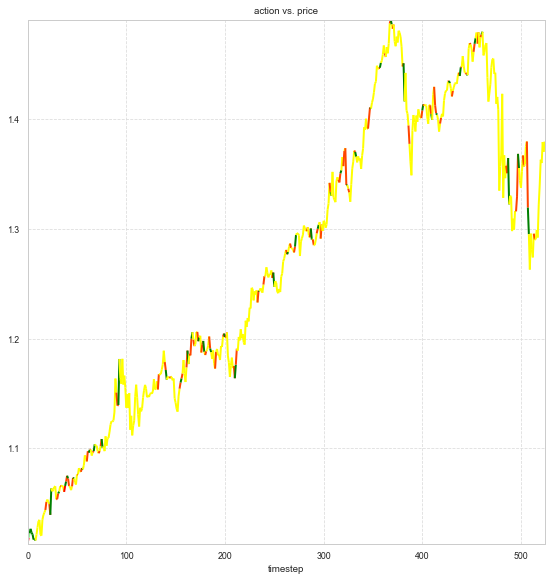

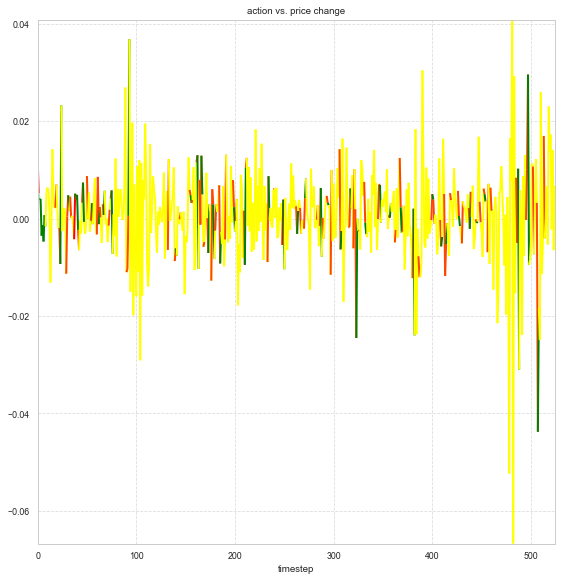

C:\Users\lucas\AppData\Local\Temp\ipykernel_31616\3581943512.py:46: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



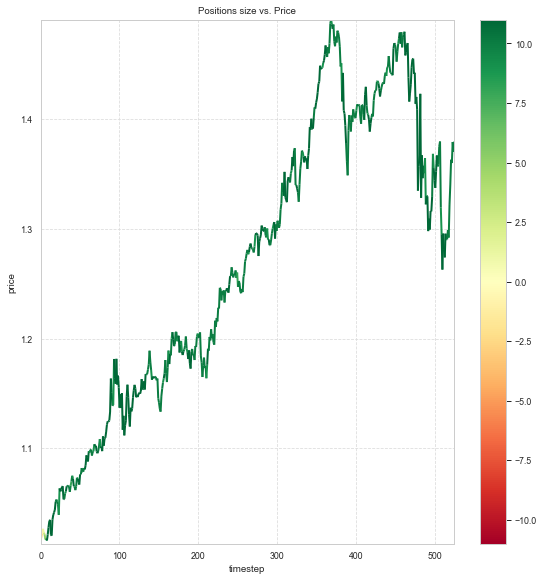

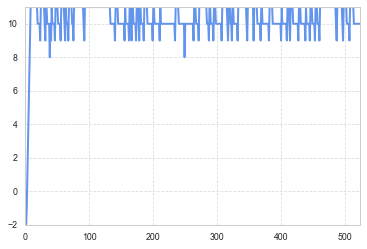

0      4
1     83
2    387
3      1
4     50
Name: 1, dtype: int64
DIFF:  0.0
ACT REW 3.1871165217065673
REW:  3.4217967443927684
RET FROM AG 3.4410481563737076
REW FROM AG 3.4217967443927684
16:29:01 episode 57755/51000:, score: 2.6099524987259266, 10-episode avg: 4.1 Memory: 0         
Train time:  50501.55271220207


In [667]:
agent.epsilon = 0.8
N_EPISODES = 51000
start_time = time.time()
print("Start: %s" % (time.strftime("%H:%M:%S")))
final_results = pd.DataFrame({0: [1], 1: [1], 2: [1], 3: [1], 4: [1]})
action_episodes = pd.DataFrame()
prices_episodes = pd.DataFrame()
return_episodes = pd.DataFrame()
position_size_episodes = pd.DataFrame()
all_return_episodes = pd.DataFrame()
for e in range(N_EPISODES):
    agent.run_episode(env=env)
    agent.score_episode(e, N_EPISODES)
    
    if e % 100 == 0:
        
        clear_output()
        prices = np.cumprod(np.array(agent.state_memory)[:,-1] + 1)
        position_plot(actions = pd.DataFrame(agent.action_memory)- 2, price = prices,
             title = "action vs. price")
        position_plot(actions = pd.DataFrame(agent.action_memory)- 2, price = np.array(agent.state_memory)[:,-1],
             title = "action vs. price change")
        color_plot(color_vals = np.array(agent.state_memory)[:,0], y_vals = prices,
             title = "Positions size vs. Price")
        plt.plot(np.array(agent.state_memory)[:,0])
        plt.show()
        unique, counts = np.unique(agent.action_memory, return_counts=True)
        results = pd.DataFrame(np.column_stack((unique, counts)).T)
        final_results = final_results.append(results.iloc[1])
        print(results.iloc[1])
        try:
            print("DIFF: ", np.sum(results.iloc[1] * np.array([-2,-1,0,1,2])) - pd.DataFrame(agent.state_memory).iloc[-1,0])
        except:
            pass
        print("ACT REW", np.sum(np.array(agent.state_memory)[:,0] * np.array(agent.state_memory)[:,-1]))
        print("REW: ", agent.results[-1])
        print("RET FROM AG", env.total_return)
        print("REW FROM AG", env.reward)
#     if e and (e+1) % agent.save_interval == 0:
#         agent.save()

    all_return_episodes = pd.concat([all_return_episodes, pd.DataFrame(agent.state_memory).iloc[:,0] * 
                                     pd.DataFrame(agent.state_memory).iloc[:,1]], axis = 1)
    
    if any(np.array([50, 100, 250, 500, 1000, 2000, 5000, 9999])+100-e == 0):
        prices = np.cumprod(np.array(agent.state_memory)[:,-1] + 1)
        action_episodes = pd.concat([action_episodes, pd.DataFrame(agent.action_memory)- 2], axis = 1)
        prices_episodes = pd.concat([prices_episodes, pd.DataFrame(prices)], axis = 1)
        return_episodes = pd.concat([return_episodes, pd.DataFrame(agent.state_memory).iloc[:,1]], axis = 1)
        position_size_episodes = pd.concat([position_size_episodes, pd.DataFrame(agent.state_memory).iloc[:,0]], axis = 1)
    if e > 99:
        #agent.epsilon = np.maximum(np.exp(-e / 20), 0.01) 
        agent.epsilon = 0.01
elapsed_time = time.time() - start_time
print("\nTrain time: ", elapsed_time)

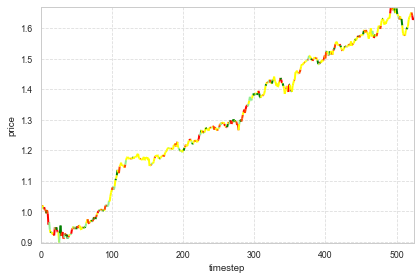

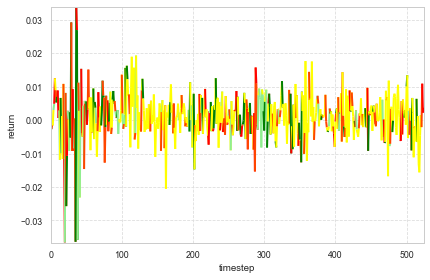

C:\Users\lucas\AppData\Local\Temp\ipykernel_31616\1961508578.py:46: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



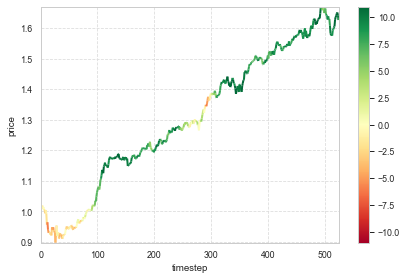

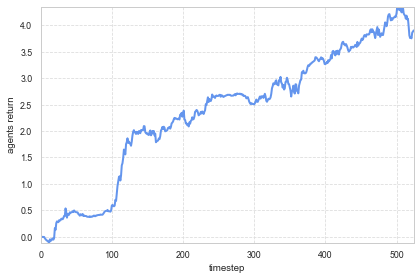

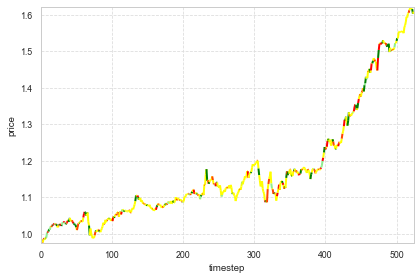

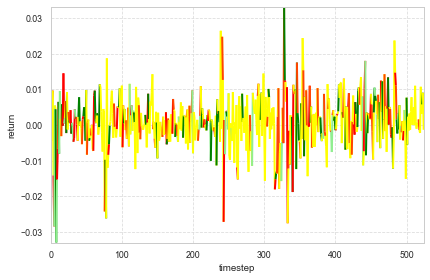

C:\Users\lucas\AppData\Local\Temp\ipykernel_31616\1961508578.py:46: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



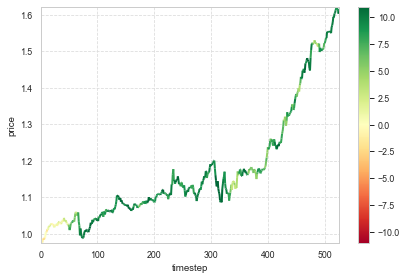

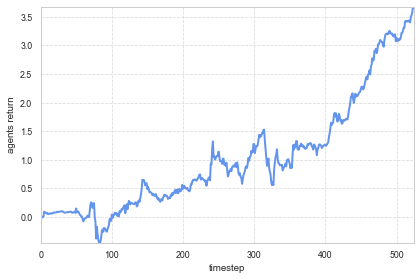

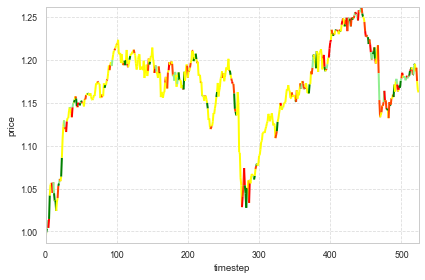

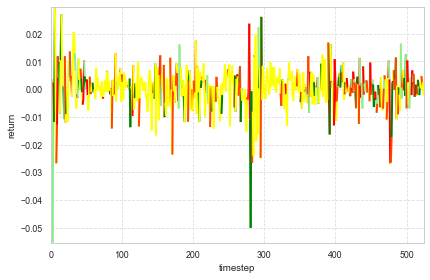

C:\Users\lucas\AppData\Local\Temp\ipykernel_31616\1961508578.py:46: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



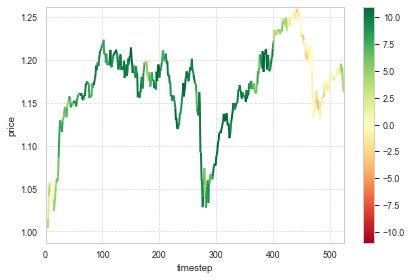

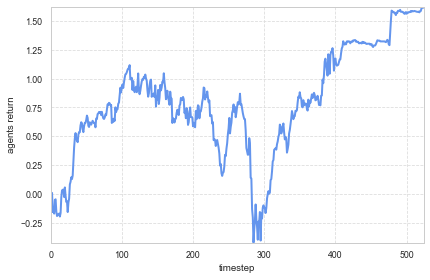

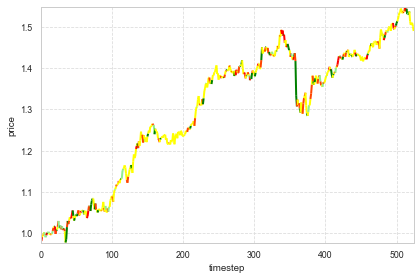

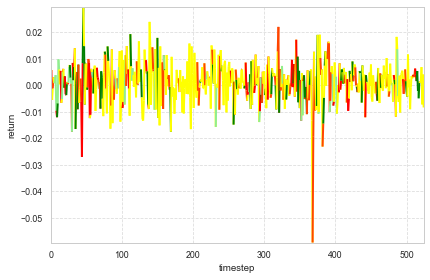

C:\Users\lucas\AppData\Local\Temp\ipykernel_31616\1961508578.py:46: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



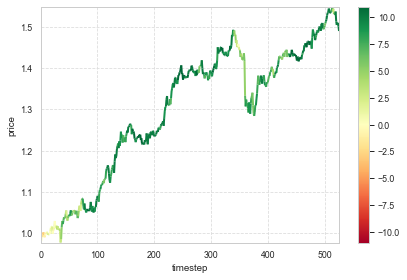

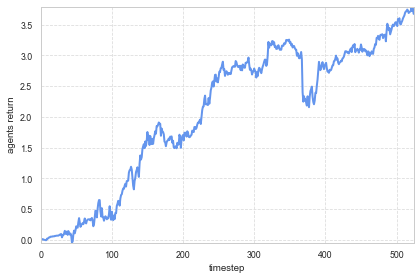

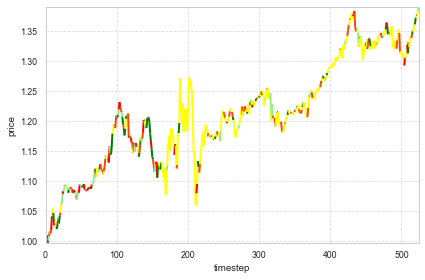

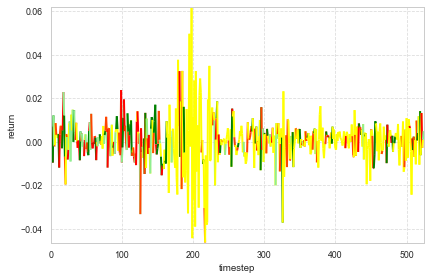

C:\Users\lucas\AppData\Local\Temp\ipykernel_31616\1961508578.py:46: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



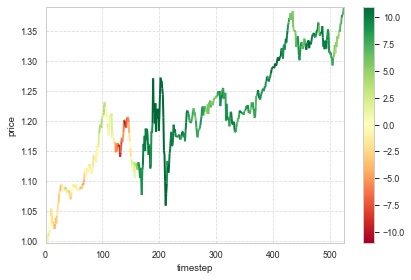

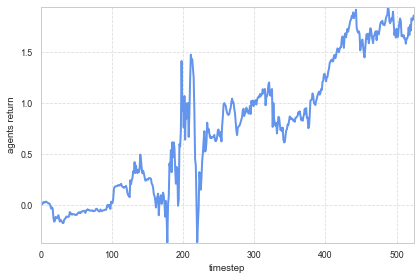

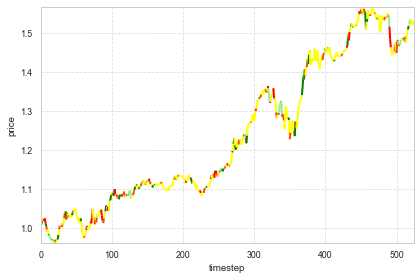

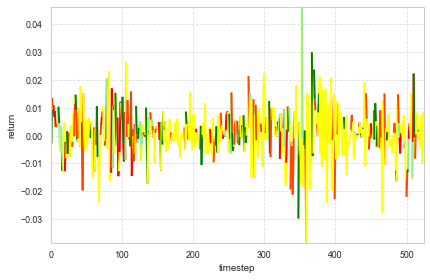

C:\Users\lucas\AppData\Local\Temp\ipykernel_31616\1961508578.py:46: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



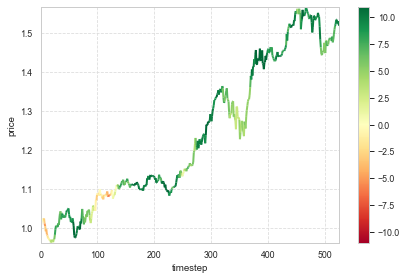

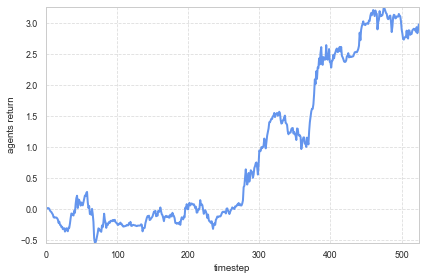

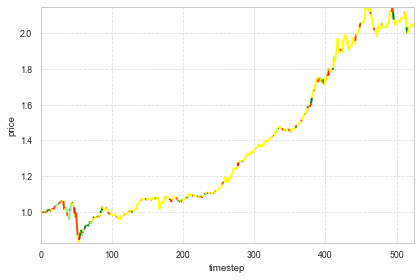

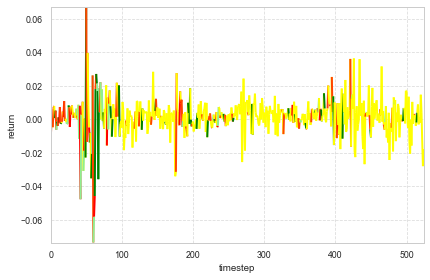

C:\Users\lucas\AppData\Local\Temp\ipykernel_31616\1961508578.py:46: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



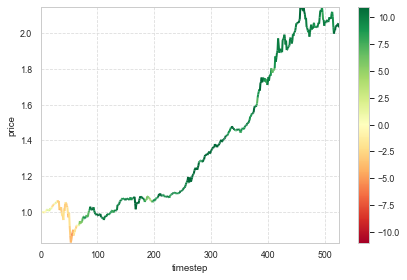

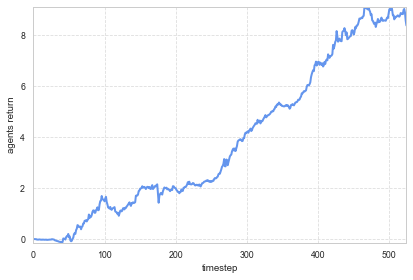

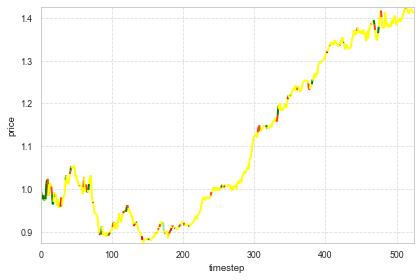

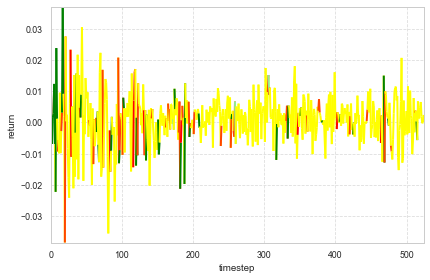

C:\Users\lucas\AppData\Local\Temp\ipykernel_31616\1961508578.py:46: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



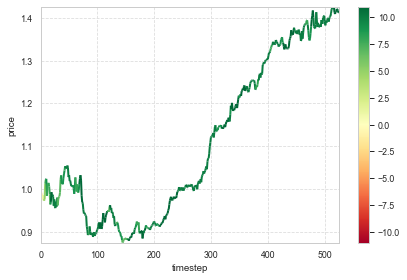

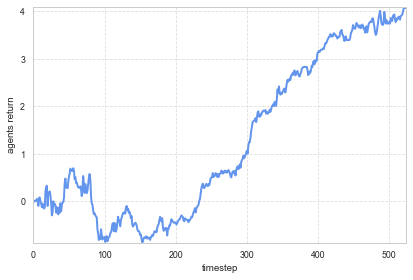

In [669]:
episode_list = [50, 100, 250, 500, 1000, 2000, 5000, 10000]
for i in range(len(episode_list)):
    position_plot(actions = action_episodes.iloc[:,i], price = prices_episodes.iloc[:,i],
         title = "", savefig = "plots/stock_agent_episodes/" + str(episode_list[i]) + "_epi_act_price_plot.png", ylab = "price")
    position_plot(actions = action_episodes.iloc[:,i], price = return_episodes.iloc[:,i],
         title = "", savefig = "plots/stock_agent_episodes/" + str(episode_list[i]) + "_epi_act_return_plot.png", ylab = "return")
    color_plot(color_vals = position_size_episodes.iloc[:,i], y_vals = prices_episodes.iloc[:,i],
         title = "", savefig = "plots/stock_agent_episodes/" + str(episode_list[i]) + "_epi_pos_plot.png")
    agent_returns = np.cumsum(position_size_episodes.iloc[:,i] * return_episodes.iloc[:,i])
    
    fig, axs = plt.subplots(1, figsize=(6, 4))
    fig.tight_layout()
    plt.plot(agent_returns)
    plt.xlabel("timestep")
    plt.ylabel("agents return")
    plt.savefig("plots/stock_agent_episodes/" + str(episode_list[i]) + "_epi_agent_return.png", bbox_inches='tight')

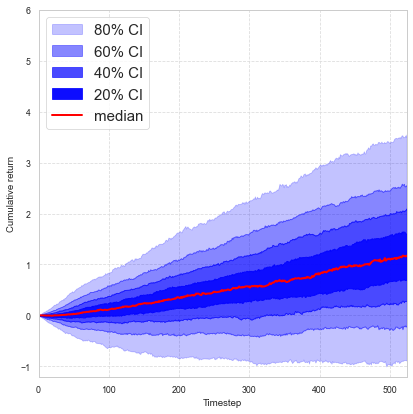

In [300]:
first_episodes = all_return_episodes.iloc[:, :1000]
first_episodes_cumret = (first_episodes).cumsum()

conf_intervals = np.linspace(0.1, 0.9, 9) * 100
x_vals = np.arange(0, all_return_episodes.shape[0], 1)
precentiles = np.percentile(first_episodes_cumret, conf_intervals, axis=1)
fig, ax = plt.subplots(figsize = (6,6))
fan_chart(x = x_vals, y = precentiles, labels=['80% CI', '60% CI', '40% CI', '20% CI', 'median'], ax = ax)
ax.set_xlabel('Timestep')
ax.set_ylabel('Cumulative return')
ax.legend(loc = 'upper left')
ax.set_ylim(-1.2, 6)
fig.tight_layout()
plt.savefig("plots/stock_agent_episodes/" + str(episode_list[i]) + "_1000_return_fanchart.png", bbox_inches='tight')

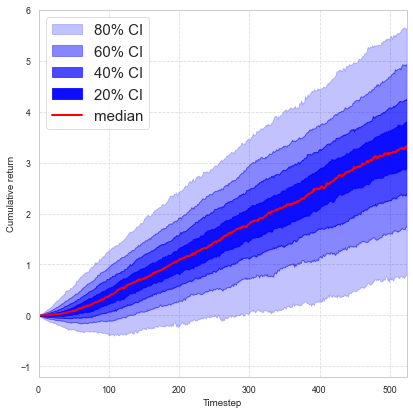

In [301]:
last_episodes = all_return_episodes.iloc[:, -1000:]
last_episodes_cumret = (last_episodes).cumsum()

conf_intervals = np.linspace(0.1, 0.9, 9) * 100
x_vals = np.arange(0, all_return_episodes.shape[0], 1)
precentiles = np.percentile(last_episodes_cumret, conf_intervals, axis=1)
fig, ax = plt.subplots(figsize = (6,6))
fan_chart(x = x_vals, y = precentiles, labels=['80% CI', '60% CI', '40% CI', '20% CI', 'median'], ax = ax)
ax.set_xlabel('Timestep')
ax.set_ylabel('Cumulative return')
ax.legend(loc = 'upper left')
ax.set_ylim(-1.2, 6)
fig.tight_layout()
plt.savefig("plots/stock_agent_episodes/" + str(episode_list[i]) + "_10000_return_fanchart.png", bbox_inches='tight')

# REINFORCE AGENT ON RAW DATA

In [158]:
n_time_points = int(250*2.5)
N_EPISODES = 100
nstocks = 1
lag = 1
env = StockEnvironmentTwo(prices = aapl_prices, n_time_points = n_time_points, 
                          price_type = "test_prices", kappa = 0.00001,
                         trade_cost = 0.00001)
global env

agent_raw_data = REINFORCE_Agent(state_size=51,
                        action_size=5,
                        discount_rate=0.90,
                        epsilon = 0.1,
                        n_hidden_layers=4, 
                        hidden_layer_size=512,
                        learning_rate=0.0000005,
                        mu_zero = False,
                        dropout = 0.1,
                        reg_penalty = 1e-4,
                        bias_reg = 1e-4
                       )

Iteration:      1,   Func. Count:      9,   Neg. LLF: 103662.89863424259
Iteration:      2,   Func. Count:     22,   Neg. LLF: 138400.42346521362
Iteration:      3,   Func. Count:     33,   Neg. LLF: 128988.95896192321
Iteration:      4,   Func. Count:     43,   Neg. LLF: 55846.62457779854
Iteration:      5,   Func. Count:     52,   Neg. LLF: 4089.5364758379624
Iteration:      6,   Func. Count:     61,   Neg. LLF: 4848.60033997863
Iteration:      7,   Func. Count:     70,   Neg. LLF: 7734.152820510075
Iteration:      8,   Func. Count:     80,   Neg. LLF: 2894.8677812926844
Iteration:      9,   Func. Count:     89,   Neg. LLF: 106477.5494124422
Iteration:     10,   Func. Count:     99,   Neg. LLF: 2892.9470284116246
Iteration:     11,   Func. Count:    107,   Neg. LLF: 2892.942340102438
Iteration:     12,   Func. Count:    115,   Neg. LLF: 2892.9417786458926
Iteration:     13,   Func. Count:    123,   Neg. LLF: 2892.9417312846226
Iteration:     14,   Func. Count:    130,   Neg. LLF: 289

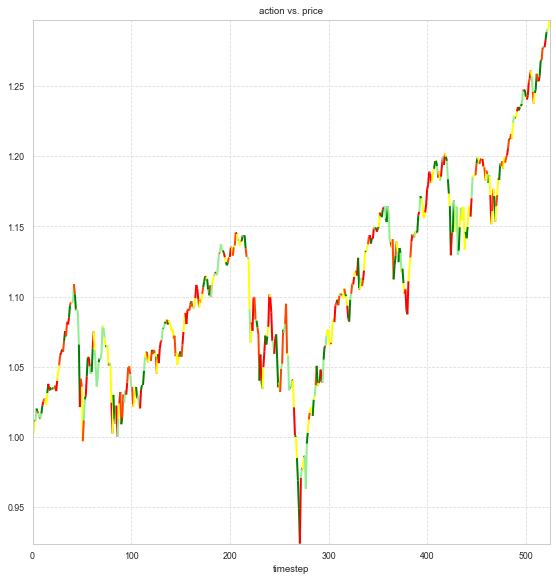

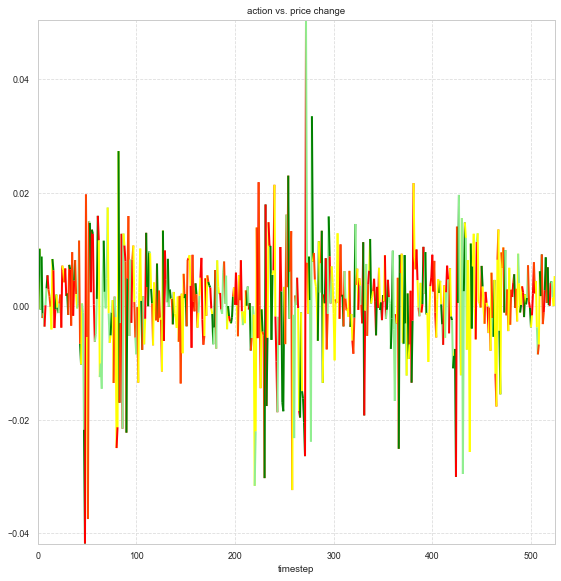

C:\Users\lucas\AppData\Local\Temp\ipykernel_31616\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


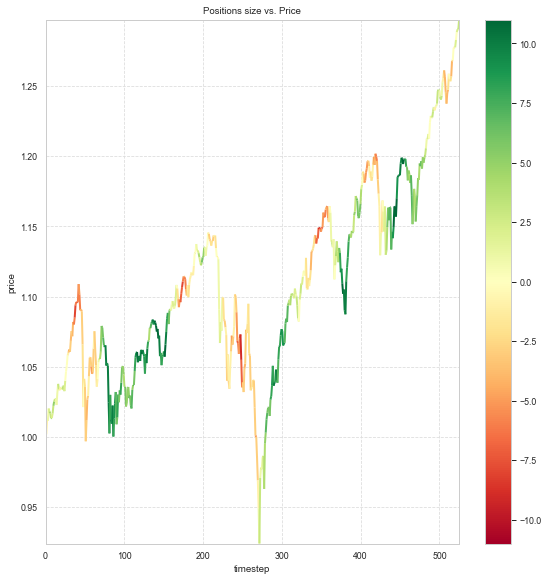

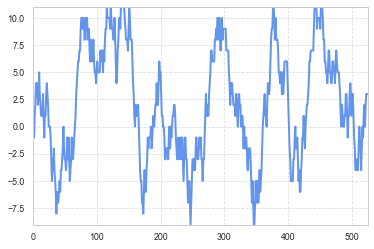

0     96
1     98
2    140
3     89
4    102
Name: 1, dtype: int64
DIFF:  0.0
ACT REW 1.635416000958274
REW:  2.1515473004295496
18:55:41 episode 10110/10110:, score: 1.5283133780923754, 10-episode avg: 1.0 Memory: 0          
Train time:  3809.369213581085


In [159]:
agent_raw_data.epsilon = 0.8
N_EPISODES = 10110
start_time = time.time()
print("Start: %s" % (time.strftime("%H:%M:%S")))
final_results = pd.DataFrame({0: [1], 1: [1], 2: [1], 3: [1], 4: [1]})
action_episodes = pd.DataFrame()
prices_episodes = pd.DataFrame()
return_episodes = pd.DataFrame()
position_size_episodes = pd.DataFrame()
all_return_episodes = pd.DataFrame()
for e in range(N_EPISODES):
    agent_raw_data.run_episode(env=env)
    agent_raw_data.score_episode(e, N_EPISODES)
    
    if e % 100 == 0:
        
        clear_output()
        prices = np.cumprod(np.array(agent_raw_data.state_memory)[:,-1] + 1)
        position_plot(actions = pd.DataFrame(agent_raw_data.action_memory)- 2, price = prices,
             title = "action vs. price")
        position_plot(actions = pd.DataFrame(agent_raw_data.action_memory)- 2, 
                      price = np.array(agent_raw_data.state_memory)[:,-1], title = "action vs. price change")
        color_plot(color_vals = np.array(agent_raw_data.state_memory)[:,0], y_vals = prices,
             title = "Positions size vs. Price")
        plt.plot(np.array(agent_raw_data.state_memory)[:,0])
        plt.show()
        unique, counts = np.unique(agent_raw_data.action_memory, return_counts=True)
        results = pd.DataFrame(np.column_stack((unique, counts)).T)
        final_results = final_results.append(results.iloc[1])
        print(results.iloc[1])
        try:
            print("DIFF: ", np.sum(results.iloc[1] * np.array([-2,-1,0,1,2])) - pd.DataFrame(agent_raw_data.state_memory).iloc[-1,0])
        except:
            pass
        print("ACT REW", np.sum(np.array(agent_raw_data.state_memory)[:,0] * np.array(agent_raw_data.state_memory)[:,-1]))
        print("REW: ", agent_raw_data.results[-1])
#     if e and (e+1) % agent.save_interval == 0:
#         agent.save()

    all_return_episodes = pd.concat([all_return_episodes, pd.DataFrame(agent_raw_data.state_memory).iloc[:,0] * 
                                     pd.DataFrame(agent_raw_data.state_memory).iloc[:,1]], axis = 1)
    
    if any(np.array([50, 100, 250, 500, 1000, 2000, 5000, 9999])+100-e == 0):
        prices = np.cumprod(np.array(agent_raw_data.state_memory)[:,-1] + 1)
        action_episodes = pd.concat([action_episodes, pd.DataFrame(agent_raw_data.action_memory)- 2], axis = 1)
        prices_episodes = pd.concat([prices_episodes, pd.DataFrame(prices)], axis = 1)
        return_episodes = pd.concat([return_episodes, pd.DataFrame(agent_raw_data.state_memory).iloc[:,1]], axis = 1)
        position_size_episodes = pd.concat([position_size_episodes, pd.DataFrame(agent_raw_data.state_memory).iloc[:,0]], axis = 1)
    if e > 99:
        #agent.epsilon = np.maximum(np.exp(-e / 20), 0.01) 
        agent_raw_data.epsilon = 0.01
elapsed_time = time.time() - start_time
print("\nTrain time: ", elapsed_time)

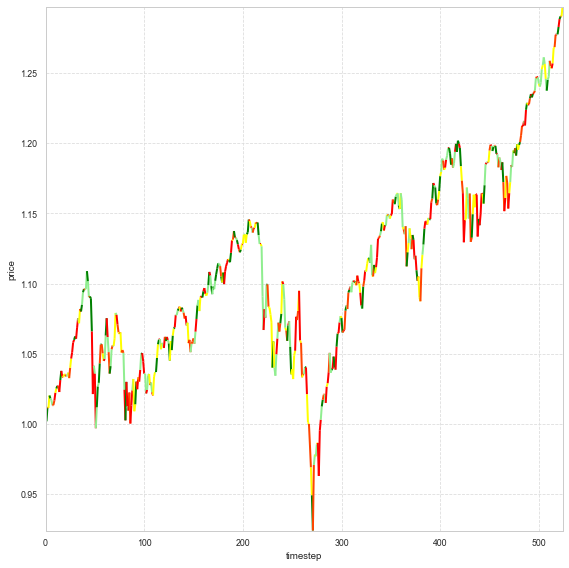

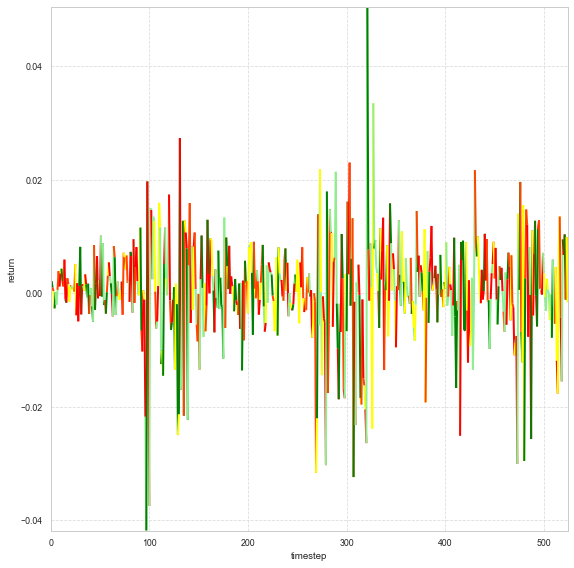

C:\Users\lucas\AppData\Local\Temp\ipykernel_31616\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


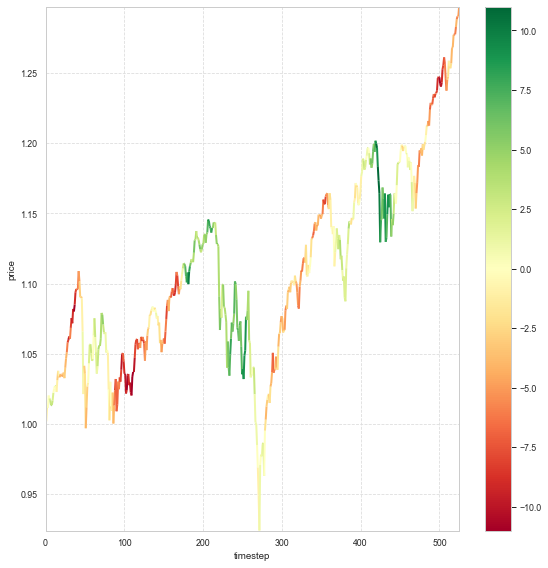

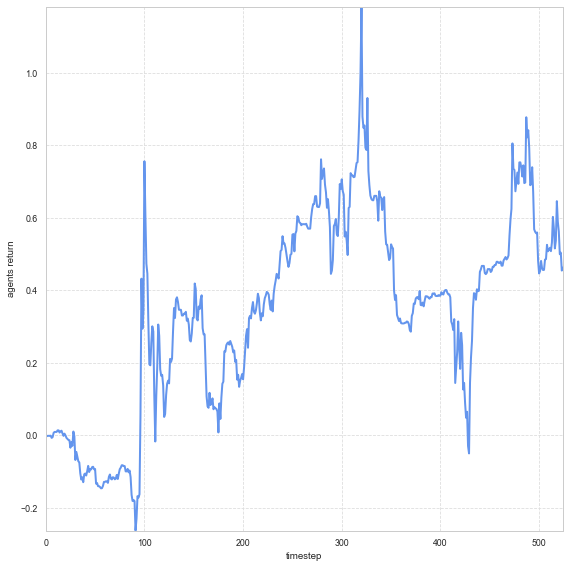

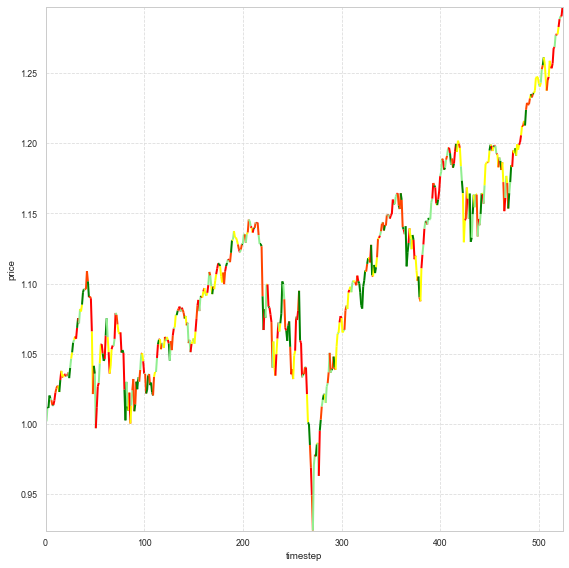

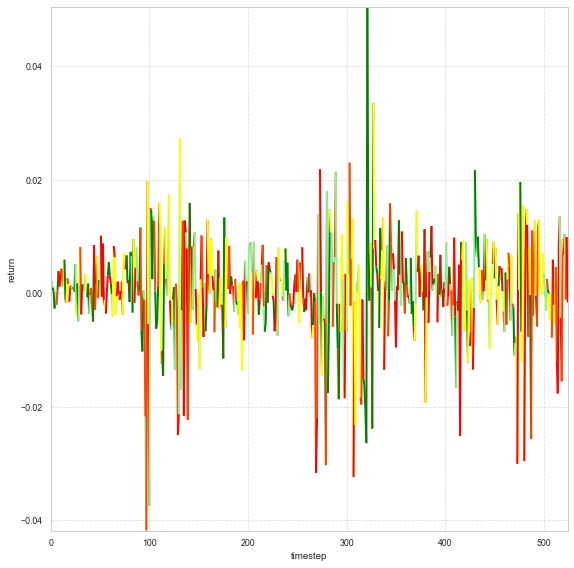

C:\Users\lucas\AppData\Local\Temp\ipykernel_31616\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


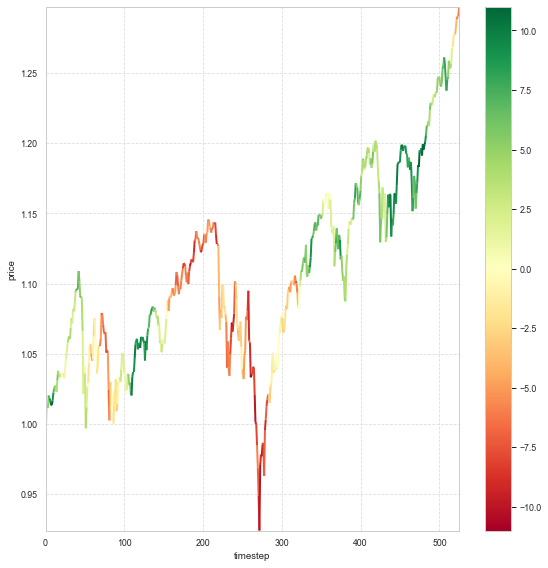

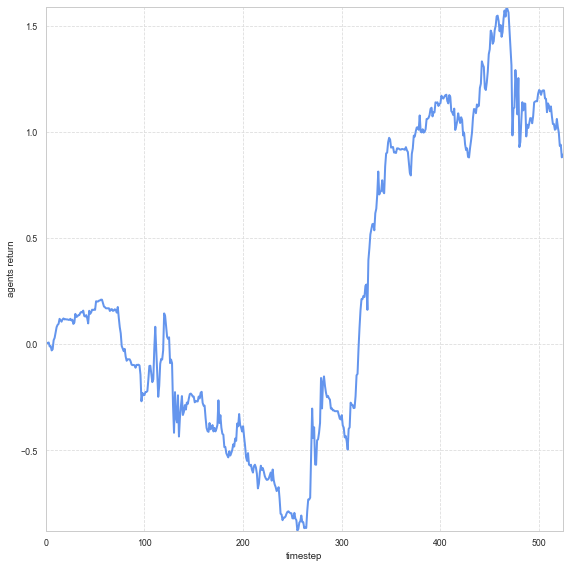

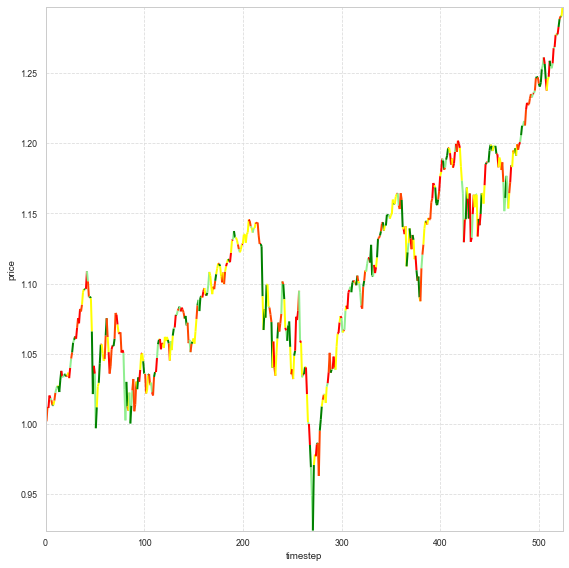

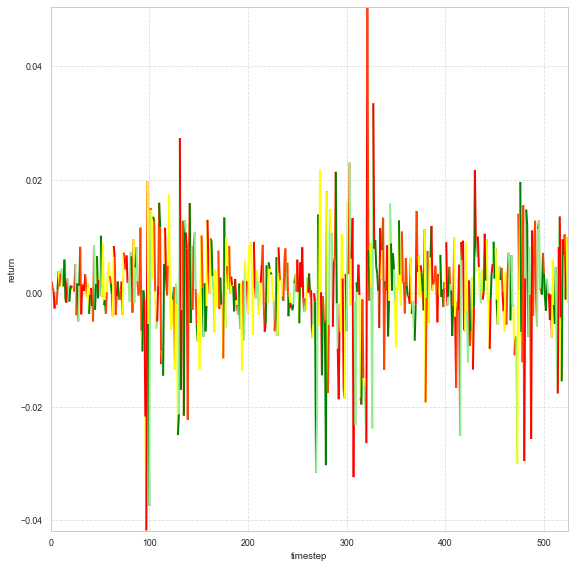

C:\Users\lucas\AppData\Local\Temp\ipykernel_31616\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


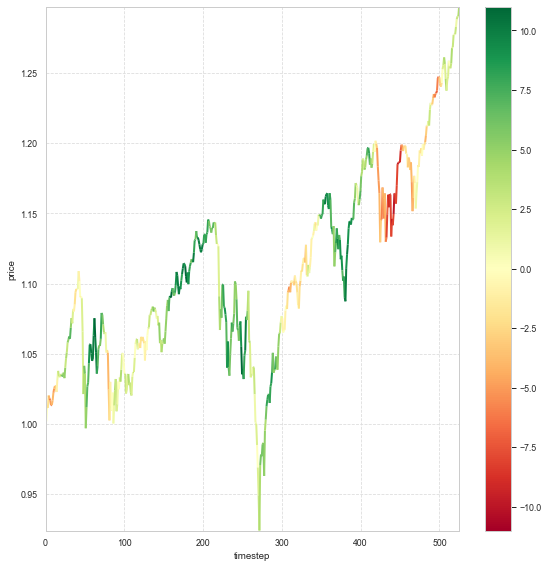

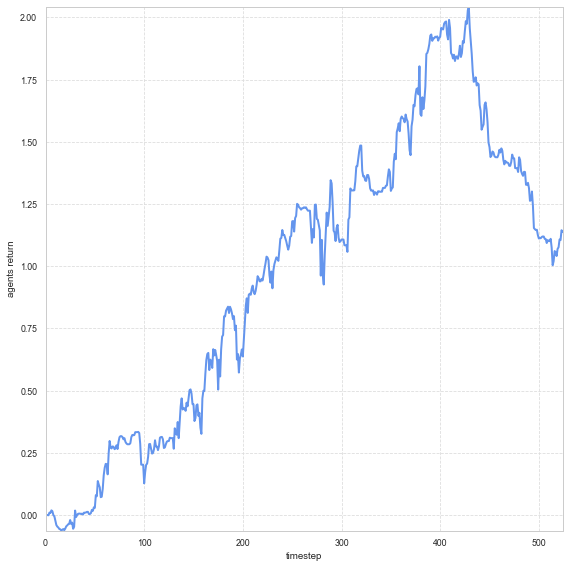

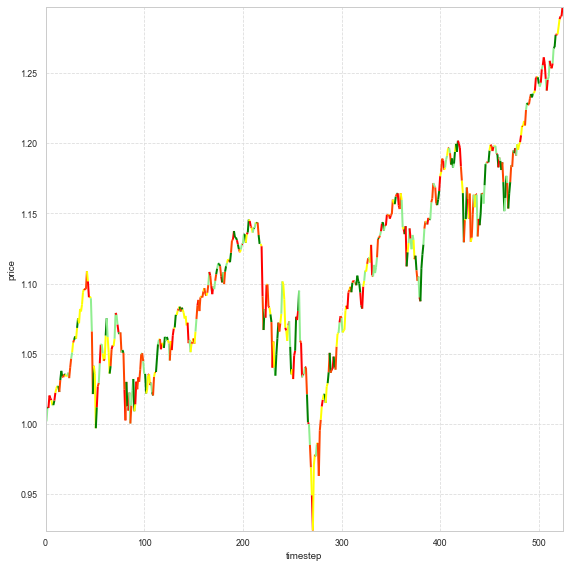

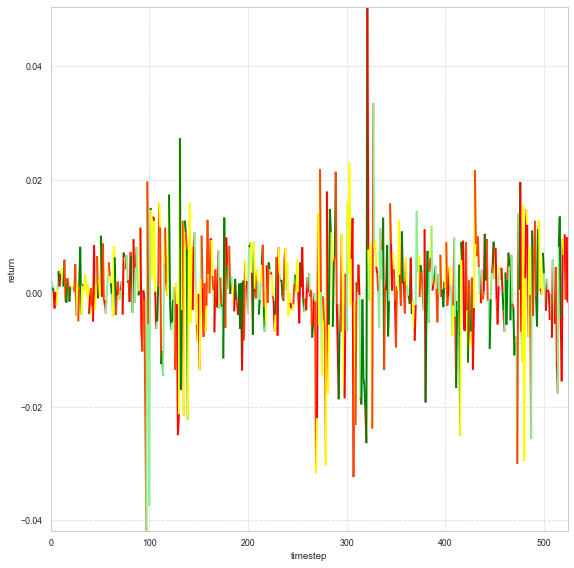

C:\Users\lucas\AppData\Local\Temp\ipykernel_31616\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


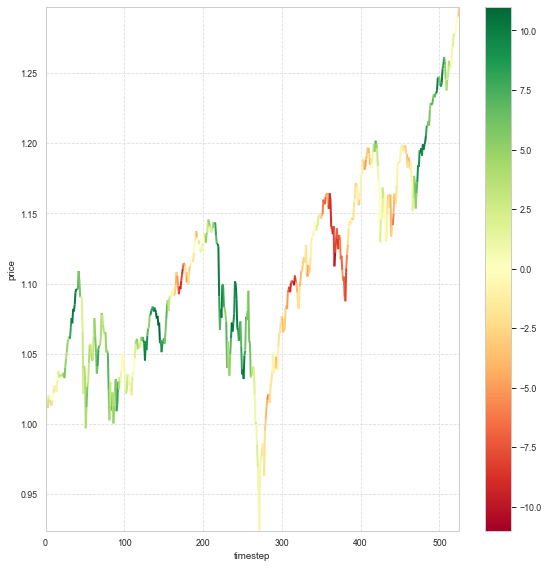

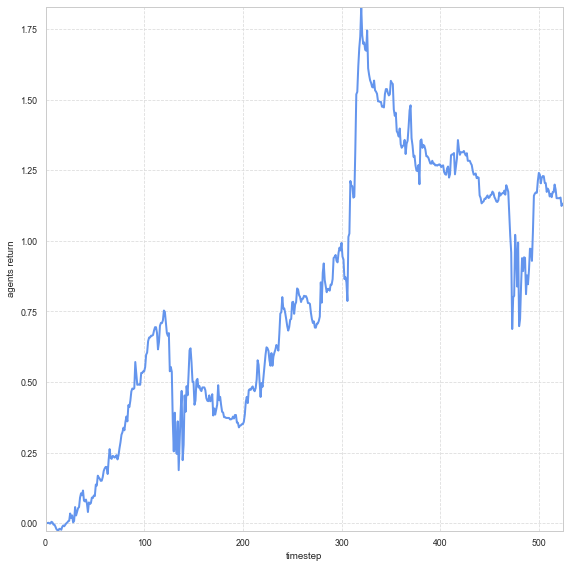

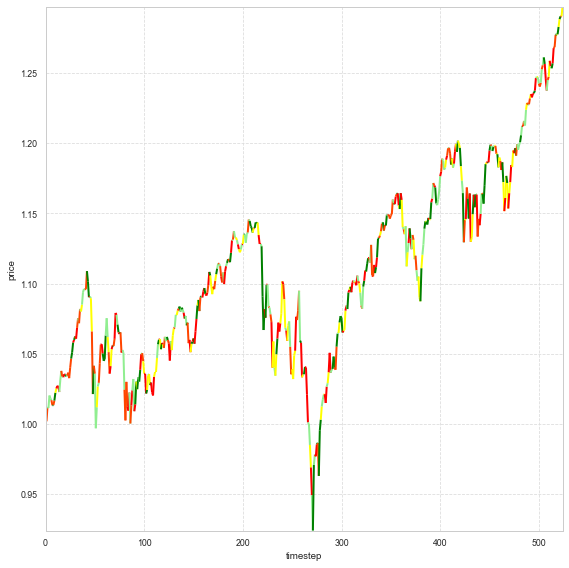

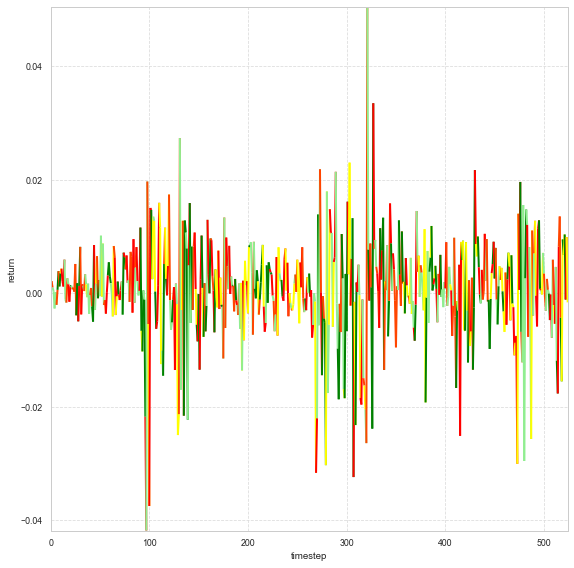

C:\Users\lucas\AppData\Local\Temp\ipykernel_31616\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


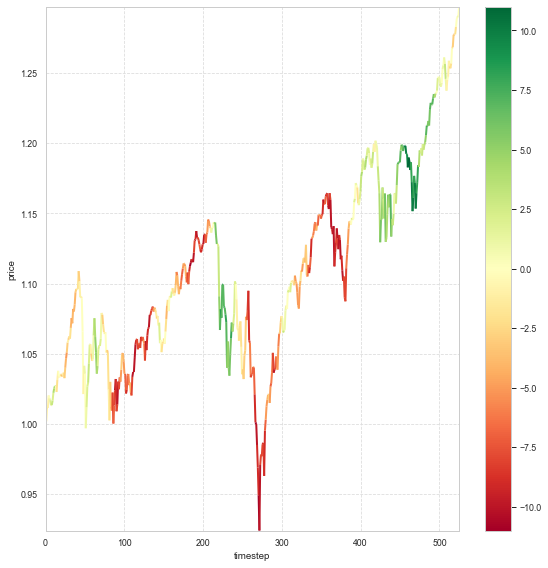

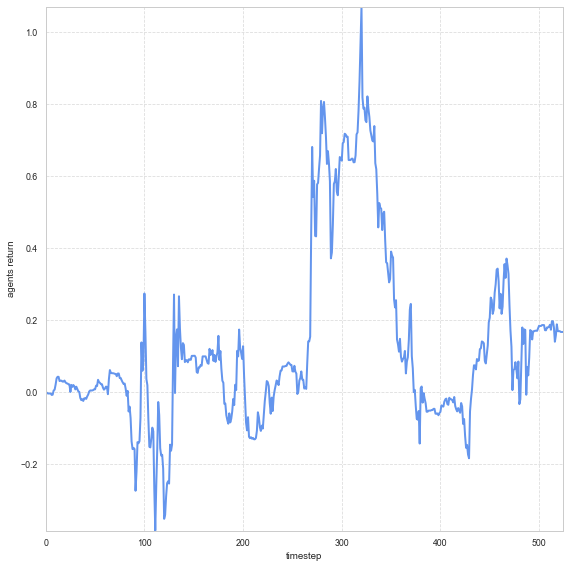

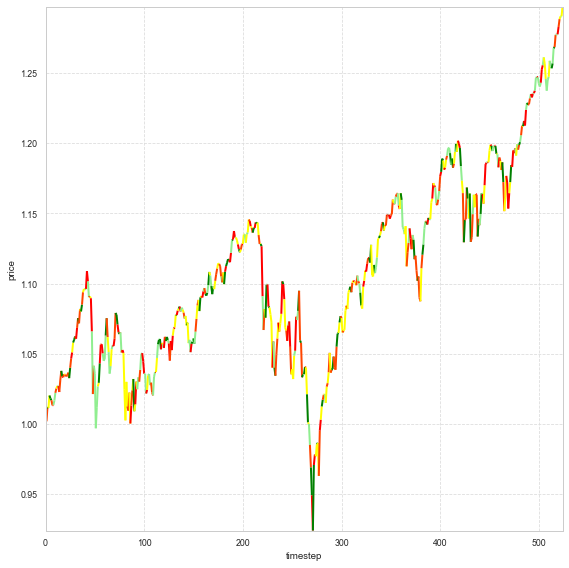

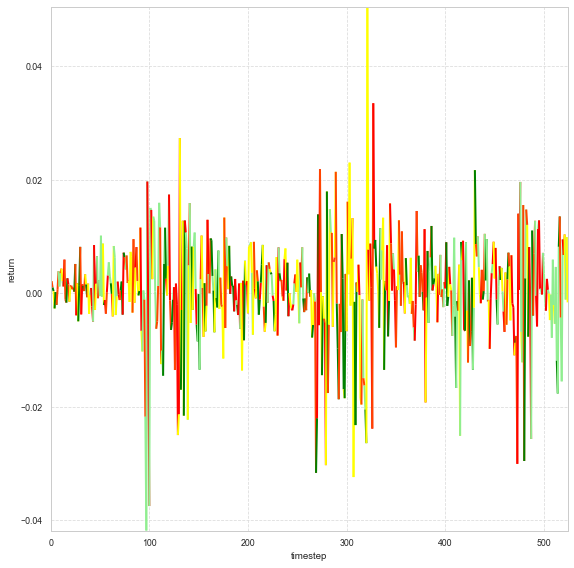

C:\Users\lucas\AppData\Local\Temp\ipykernel_31616\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


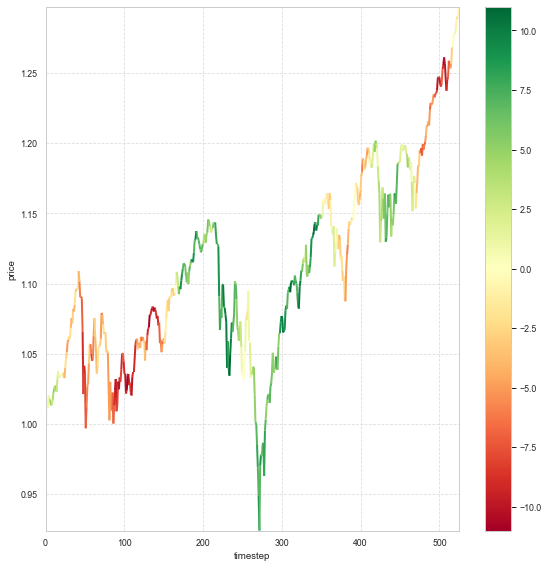

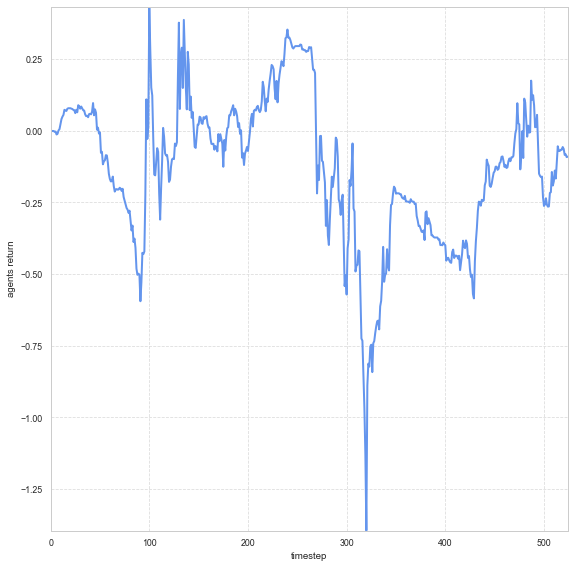

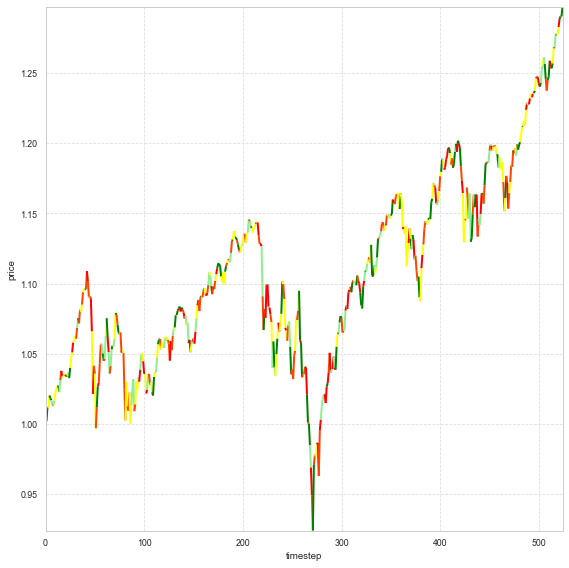

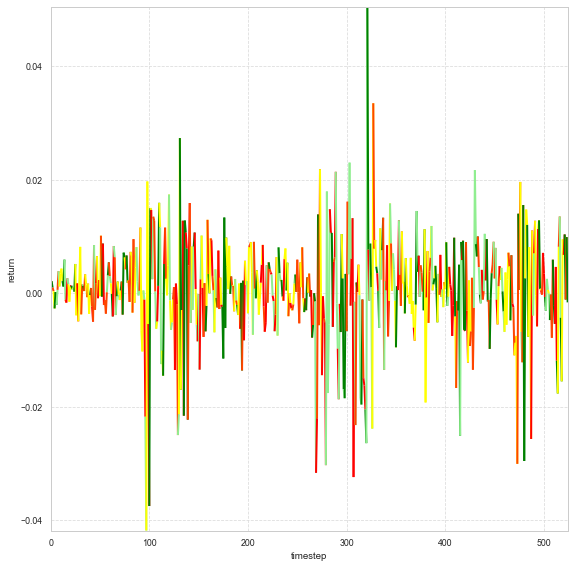

C:\Users\lucas\AppData\Local\Temp\ipykernel_31616\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


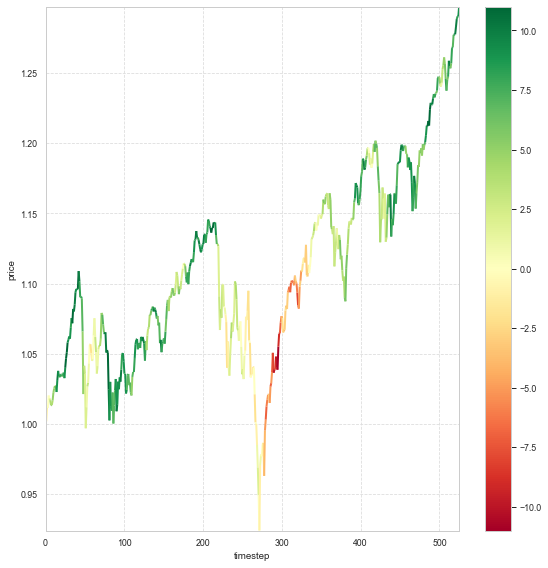

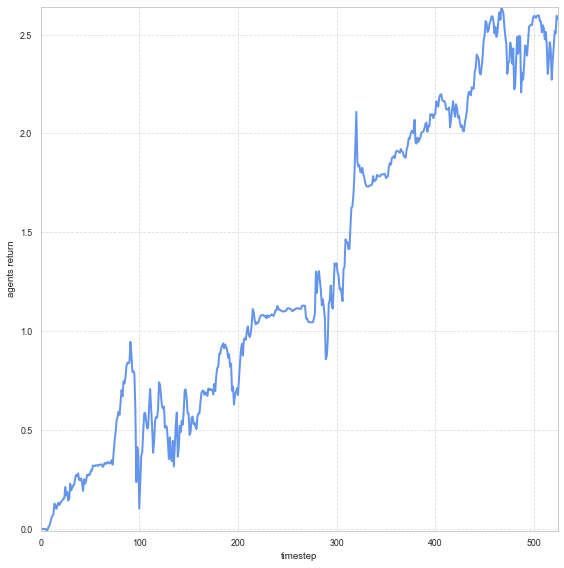

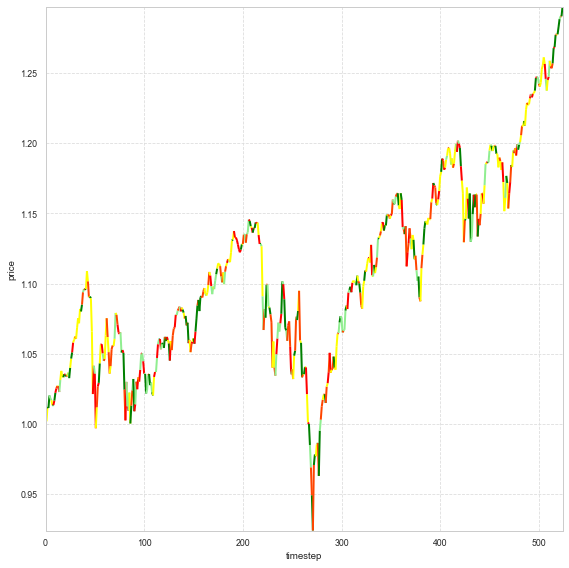

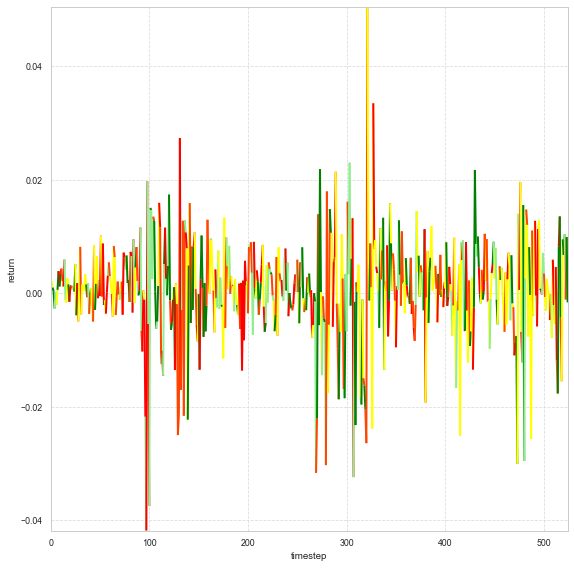

C:\Users\lucas\AppData\Local\Temp\ipykernel_31616\2699128155.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs)


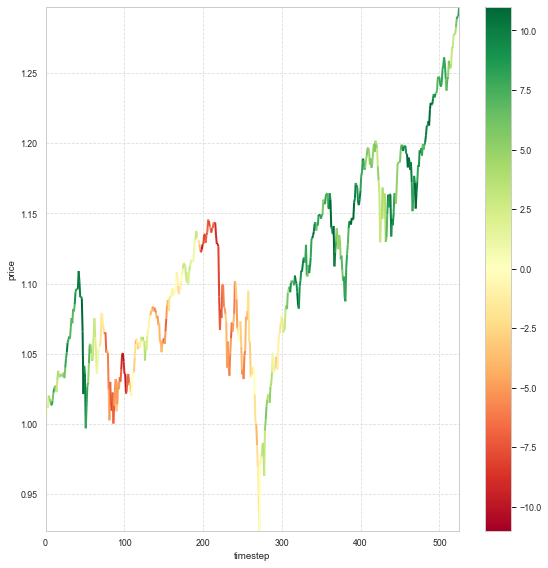

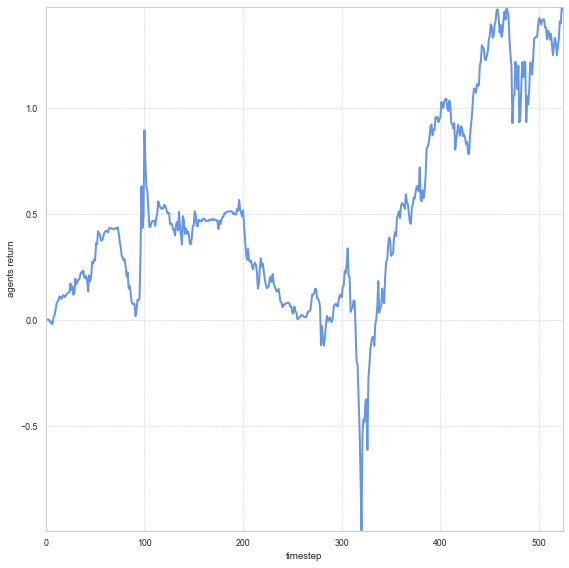

In [160]:
episode_list = [50, 100, 250, 500, 1000, 2000, 5000, 10000]
for i in range(len(episode_list)):
    position_plot(actions = action_episodes.iloc[:,i], price = prices_episodes.iloc[:,i],
         title = "", savefig = "plots/stock_agent_episodes/" + str(episode_list[i]) + "_epi_raw_act_price_plot.png", ylab = "price")
    position_plot(actions = action_episodes.iloc[:,i], price = return_episodes.iloc[:,i],
         title = "", savefig = "plots/stock_agent_episodes/" + str(episode_list[i]) + "_epi_raw_act_return_plot.png", ylab = "return")
    color_plot(color_vals = position_size_episodes.iloc[:,i], y_vals = prices_episodes.iloc[:,i],
         title = "", savefig = "plots/stock_agent_episodes/" + str(episode_list[i]) + "_epi_raw_pos_plot.png")
    agent_returns = np.cumsum(position_size_episodes.iloc[:,i] * return_episodes.iloc[:,i])
    
    fig, axs = plt.subplots(1, figsize=(8, 8))
    fig.tight_layout()
    plt.plot(agent_returns)
    plt.xlabel("timestep")
    plt.ylabel("agents return")
    plt.savefig("plots/stock_agent_episodes/" + str(episode_list[i]) + "_epi_raw_agent_return.png", bbox_inches='tight')

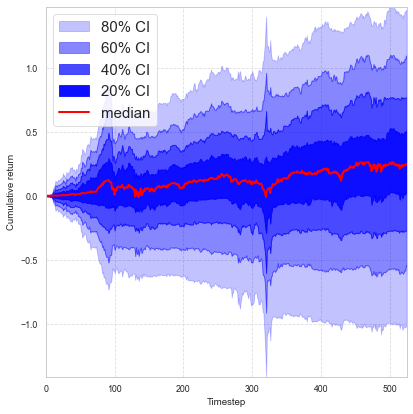

In [163]:
first_episodes = all_return_episodes.iloc[:, :1000]
first_episodes_cumret = (first_episodes).cumsum()

conf_intervals = np.linspace(0.1, 0.9, 9) * 100
x_vals = np.arange(0, all_return_episodes.shape[0], 1)
precentiles = np.percentile(first_episodes_cumret, conf_intervals, axis=1)
fig, ax = plt.subplots(figsize = (6,6))
fan_chart(x = x_vals, y = precentiles, labels=['80% CI', '60% CI', '40% CI', '20% CI', 'median'], ax = ax)
ax.set_xlabel('Timestep')
ax.set_ylabel('Cumulative return')
ax.legend(loc = 'upper left')
#ax.set_ylim(-1.2, 6)
fig.tight_layout()
plt.savefig("plots/stock_agent_episodes/" + str(episode_list[i]) + "_1000_raw_return_fanchart.png", bbox_inches='tight')

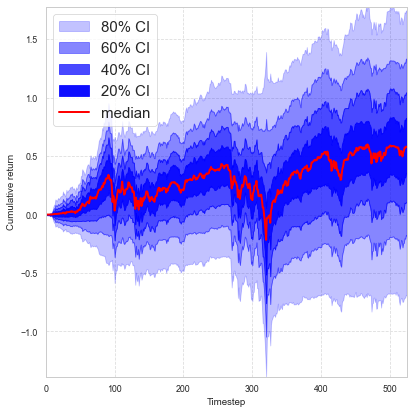

In [164]:
last_episodes = all_return_episodes.iloc[:, -1000:]
last_episodes_cumret = (last_episodes).cumsum()

conf_intervals = np.linspace(0.1, 0.9, 9) * 100
x_vals = np.arange(0, all_return_episodes.shape[0], 1)
precentiles = np.percentile(last_episodes_cumret, conf_intervals, axis=1)
fig, ax = plt.subplots(figsize = (6,6))
fan_chart(x = x_vals, y = precentiles, labels=['80% CI', '60% CI', '40% CI', '20% CI', 'median'], ax = ax)
ax.set_xlabel('Timestep')
ax.set_ylabel('Cumulative return')
ax.legend(loc = 'upper left')
#ax.set_ylim(-1.2, 6)
fig.tight_layout()
plt.savefig("plots/stock_agent_episodes/" + str(episode_list[i]) + "_10000_raw_return_fanchart.png", bbox_inches='tight')

In [166]:
agent.rlplot("Training Progress: Simple Harmonic Motion")

# TESTING ON REAL DATA

In [564]:
test_prices = ffn.get('spy', start = '2019-03-19', end = '2022-04-01')
#test_prices = ffn.get('spy', start = '2018-03-19', end = '2022-04-01')

In [586]:
n_time_points = int(250*2.5)
nstocks = 1
lag = 1
env = StockEnvironmentTwo(prices = test_prices, n_time_points = n_time_points, 
                          price_type = "test_prices", kappa = 0.00001,
                         trade_cost = 0.00001)
global env

TensorFlow 2.8.0
Keras 2.8.0
plotly 5.7.0
pandas 1.4.2
numpy 1.22.3


AttributeError: 'numpy.ndarray' object has no attribute 'to_returns'

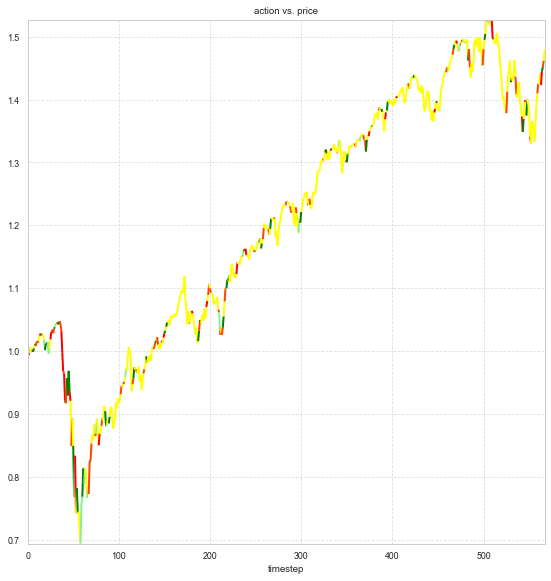

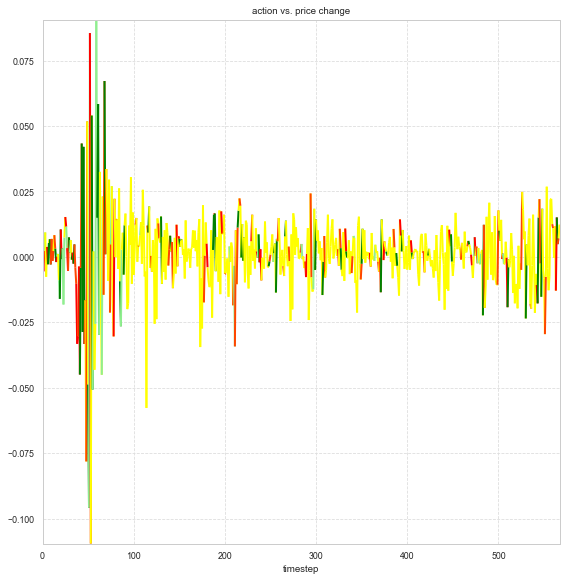

C:\Users\lucas\AppData\Local\Temp\ipykernel_31616\3581943512.py:46: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



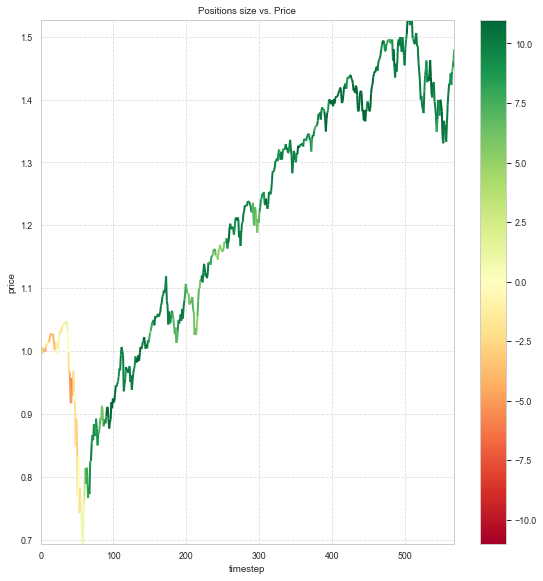

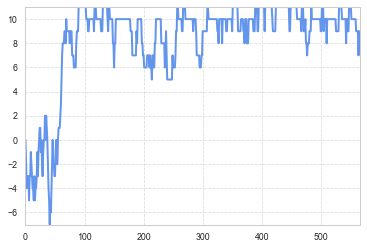

0     35
1     58
2    393
3     28
4     54
Name: 1, dtype: int64
DIFF:  0.0
ACT REW 7.112815904484142
REW:  6.402700436632674


In [650]:
agent.epsilon = 0.0
N_EPISODES = 1

final_results = pd.DataFrame({0: [1], 1: [1], 2: [1], 3: [1], 4: [1]})
action_episodes = pd.DataFrame()
prices_episodes = pd.DataFrame()
return_episodes = pd.DataFrame()
position_size_episodes = pd.DataFrame()
all_return_episodes = pd.DataFrame()

agent.run_episode(env=env)
agent.score_episode(e, N_EPISODES)
        
#clear_output()
prices = np.cumprod(np.array(agent.state_memory)[:,-1] + 1)
position_plot(actions = pd.DataFrame(agent.action_memory)- 2, price = prices,
     title = "action vs. price")
position_plot(actions = pd.DataFrame(agent.action_memory)- 2, 
              price = np.array(agent.state_memory)[:,-1], title = "action vs. price change")
color_plot(color_vals = np.array(agent.state_memory)[:,0], y_vals = prices,
     title = "Positions size vs. Price")
plt.plot(np.array(agent.state_memory)[:,0])
plt.show()
unique, counts = np.unique(agent.action_memory, return_counts=True)
results = pd.DataFrame(np.column_stack((unique, counts)).T)

print(results.iloc[1])
try:
    print("DIFF: ", np.sum(results.iloc[1] * np.array([-2,-1,0,1,2])) - pd.DataFrame(agent.state_memory).iloc[-1,0])
except:
    pass
print("ACT REW", np.sum(np.array(agent.state_memory)[:,0] * np.array(agent.state_memory)[:,-1]))
print("REW: ", agent.results[-1])

test_all_return_episodes = pd.DataFrame(agent.state_memory).iloc[:,0] * pd.DataFrame(agent.state_memory).iloc[:,1]
test_prices = np.cumprod(np.array(agent.state_memory)[:,-1] + 1)
test_action_episodes = pd.DataFrame(agent.action_memory)- 2
test_prices_episodes = pd.DataFrame(prices)
test_return_episodes = pd.DataFrame(agent.state_memory).iloc[:,1]
test_position_size_episodes = pd.DataFrame(agent.state_memory).iloc[:,0]

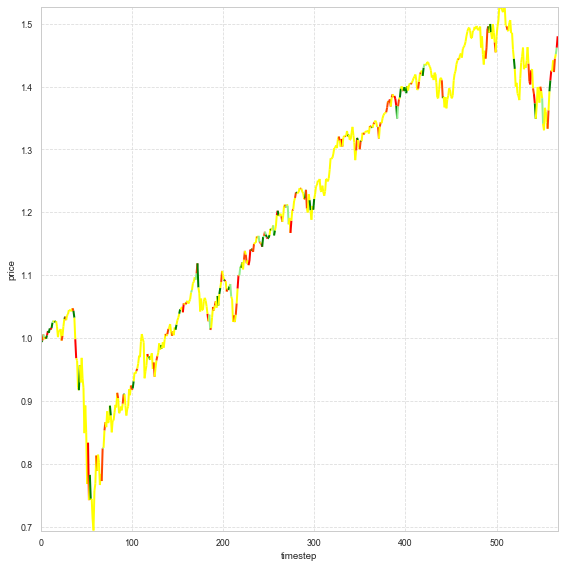

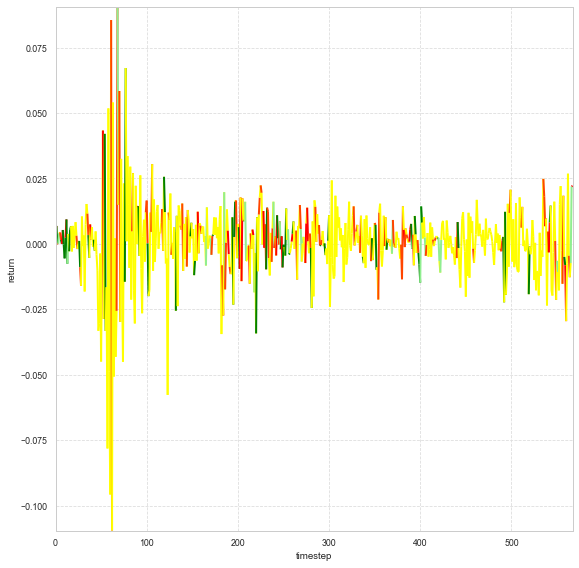

C:\Users\lucas\AppData\Local\Temp\ipykernel_31616\3581943512.py:46: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



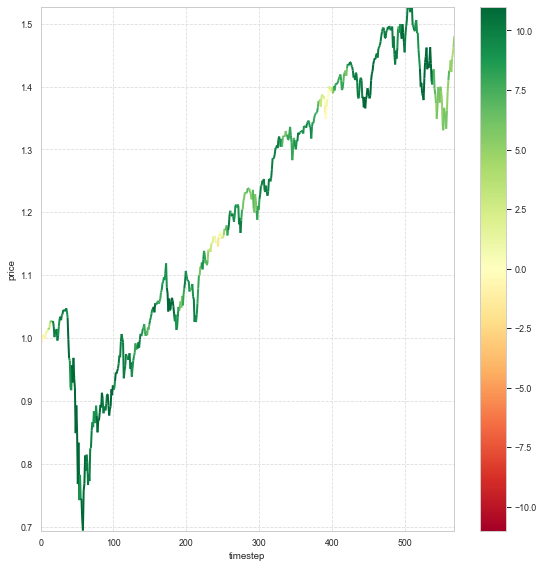

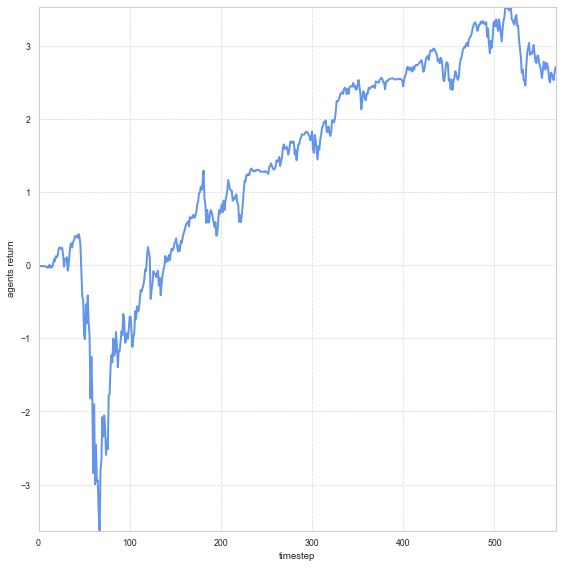

In [589]:
position_plot(actions = test_action_episodes.iloc[:,0], price = test_prices_episodes.iloc[:,0],
     title = "", savefig = "plots/stock_agent_episodes/test_epi_act_price_plot.png", ylab = "price")
position_plot(actions = test_action_episodes.iloc[:,0], price = test_return_episodes,
     title = "", savefig = "plots/stock_agent_episodes/test_epi_act_return_plot.png", ylab = "return")
color_plot(color_vals = test_position_size_episodes, y_vals = test_prices_episodes.iloc[:,0],
     title = "", savefig = "plots/stock_agent_episodes/test_epi_pos_plot.png")
test_agent_returns = np.cumsum(test_position_size_episodes * test_return_episodes)

fig, axs = plt.subplots(1, figsize=(8, 8))
fig.tight_layout()
plt.plot(test_agent_returns)
plt.xlabel("timestep")
plt.ylabel("agents return")
plt.savefig("plots/stock_agent_episodes/test_epi_agent_return.png", bbox_inches='tight')

# Comparing to BUY AND HOLD

In [651]:
from scipy.stats import norm
agent_result_returns = pd.DataFrame(agent.state_memory).iloc[:,0] * pd.DataFrame(agent.state_memory).iloc[:,-1]

buy_and_hold_returns = pd.DataFrame(pd.DataFrame(np.repeat(10, len(agent_result_returns))).iloc[:,0] * 
                                    pd.DataFrame(agent.state_memory).iloc[:,-1]).values
### MEAN AGENT RETURN ###
mean_agent_return = np.mean(agent_result_returns)
mean_bh_return = np.mean(buy_and_hold_returns)
### RETURN ####
total_agent_return = np.sum(agent_result_returns)
total_bh_return = np.sum(buy_and_hold_returns)
### VARIANCE ###
total_agent_sd = np.std(agent_result_returns)
total_bh_sd = np.std(buy_and_hold_returns)
### Value At Risk ###
total_agent_var_return = norm.ppf(0.95, mean_agent_return, total_agent_sd)
total_bh_var_return = norm.ppf(0.95, mean_bh_return, total_bh_sd)
### Conditional Value At Risk ###
total_agent_cvar_return = (1 / (1 - 0.95)) * norm.expect(lambda x: x, loc = mean_agent_return, 
                                                         scale = total_agent_sd, lb = total_agent_var_return)
total_bh_cvar_return = (1 / (1 - 0.95)) * norm.expect(lambda x: x, loc = mean_bh_return, 
                                                         scale = total_bh_sd, lb = total_bh_var_return)
### MAX DRAWDOWN ###
max_dd_agent_return = np.min(agent_result_returns)
max_dd_bh_return = np.min(buy_and_hold_returns)
# ### PRINT ###
# print(total_agent_cvar_return)
# total_bh_cvar_return

out = pd.DataFrame({'REINFORCE': [total_agent_return, total_agent_sd, 
                                  total_agent_var_return, total_agent_cvar_return,
                                 max_dd_agent_return],
                    'Buy and Hold': [total_bh_return, total_bh_sd, 
                                     total_bh_var_return, total_bh_cvar_return,
                                    max_dd_bh_return]},
                  index = ['Return', 'sd', 'VaR_95', 'CVaR_95', 'Max DD'])
print(out.to_latex(label="tab:performance_stock_experiment"))

\begin{table}
\centering
\label{tab:performance_stock_experiment}
\begin{tabular}{lrr}
\toprule
{} &  REINFORCE &  Buy and Hold \\
\midrule
Return  &   7.112816 &      4.623759 \\
sd      &   0.105219 &      0.156679 \\
VaR\_95  &   0.185592 &      0.265855 \\
CVaR\_95 &   0.229559 &      0.331325 \\
Max DD  &  -0.576488 &     -1.094237 \\
\bottomrule
\end{tabular}
\end{table}



In [434]:
pd.DataFrame(agent.state_memory).iloc[:,-1]

0     -0.000248
1     -0.005513
2      0.002429
3      0.009352
4     -0.007572
         ...   
563   -0.012878
564    0.015074
565    0.004884
566    0.007113
567    0.012371
Name: 10, Length: 568, dtype: float64

In [520]:
#-2.47854537e-04
#(test_prices["spy"][201:].values/test_prices["spy"][200:-1].values - 1) - -2.47854537e-04
pdt = pd.DataFrame({'test': (test_prices["spy"][1:].values/test_prices["spy"][:-1].values - 1) + 2.47854537e-04})
apdt = np.abs(pdt)
apdt.sort_values(by = "test")
test_prices.iloc[196]

spy    311.880615
Name: 2019-12-26 00:00:00, dtype: float64

In [525]:
np.sum(test_prices["spy"][196:].values/test_prices["spy"][195:-1].values - 1)

0.44896716697351646

In [523]:
test_prices["spy"][200:]

Date
2020-01-02    313.744537
2020-01-03    311.368744
2020-01-06    312.556610
2020-01-07    311.677795
2020-01-08    313.338928
                 ...    
2022-03-28    455.910004
2022-03-29    461.549988
2022-03-30    458.700012
2022-03-31    451.640015
2022-04-01    452.920013
Name: spy, Length: 568, dtype: float64

In [ ]:
pd.DataFrame(agent.state_memory).iloc[:,0] * pd.DataFrame(agent.state_memory).iloc[:,1]

In [582]:
test_prices = ffn.get('spy', start = '2020-01-02', end = '2022-04-01')
#test_prices = ffn.get('spy', start = '2019-03-19', end = '2022-04-01')
(test_prices["spy"][-3]/test_prices["spy"][0] - 1) * 10

4.620176679201384